<a href="https://colab.research.google.com/github/Calmegi/matstat/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import math
import statistics
from scipy import stats as sps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. Исходные данные**


In [ ]:
x_1 = sps.norm.rvs(size=200, loc=10, scale=2)
x_2 = sps.norm.rvs(size=200, loc=5, scale=2)

In [ ]:
# выведем по 10 первых значений 1-й и 2-й выборки
print(x_1[:10])
print()
print(x_2[:10])

[11.66487529  7.82621565  9.06634688 11.98623858  8.66245264  7.5227848
 13.25405499 10.08177735 12.70166805  9.65922729]

[4.91353644 3.87768473 4.18505398 5.89237394 4.22086947 4.21450848
 6.26071499 6.57595677 1.61375765 7.44306762]


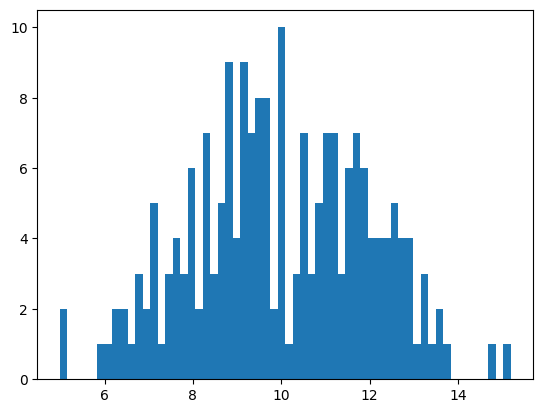

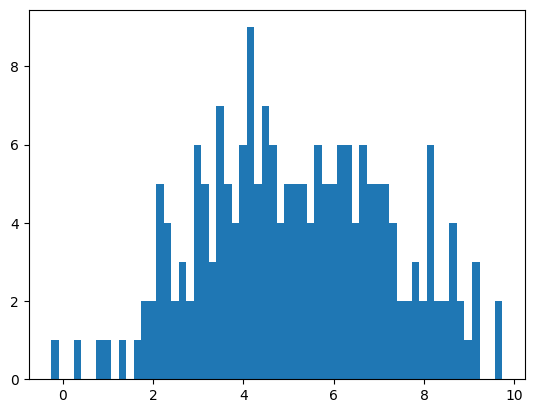

In [ ]:
# гистограмма для 1-го распределения (bins - кол-во интервалов всех ячеек равной ширины)
plt.hist(x_1, bins=60)
plt.show()

# гистограмма для 2-го распределения
plt.hist(x_2, bins=60)
plt.show()

In [ ]:
mean_1 = x_1.mean()
mean_2 = x_2.mean()

print('mean_1: {:f}'.format(mean_1))
print('mean_2: {:f}'.format(mean_2))

var_1 = x_1.var()
var_2 = x_2.var()

print('var_1: {:f}'.format(var_1))
print('var_2: {:f}'.format(var_2))

std_1 = x_1.std()
std_2 = x_2.std()

print('std_1: {:f}'.format(std_1))
print('std_2: {:f}'.format(std_2))

mean_1: 9.978734
mean_2: 5.203092
var_1: 3.919782
var_2: 4.226044
std_1: 1.979844
std_2: 2.055734


In [ ]:
#pooled
x_p = np.concatenate([x_1, x_2])
mean_p = x_p.mean()
var_p = x_p.var()
std_p = x_p.std()

print('mean_p: {:f}'.format(mean_p))
print('var_p: {:f}'.format(var_p))
print('std_p: {:f}'.format(std_p))

mean_p: 7.590913
var_p: 9.774602
std_p: 3.126436


**2. Однопараметрические критерии**


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

In [ ]:
#z-test:
#выводим выборочное значение статистики и p-value
#при p-value > alpha - гипотеза принимается
ztest(x_1, value=10)

(-0.15152322759970205, 0.8795629893969663)

In [ ]:
#t-test:
#выводим выборочное значение статистики и p-value
#при p-value > alpha - гипотеза принимается
sps.ttest_1samp(a=x_1, popmean=10)

TtestResult(statistic=-0.15152322759970205, pvalue=0.879716486447931, df=199)

In [ ]:
#хи2-test: m - известно
#выводим выборочное значение статистики и p-value
#при p-value > a - гипотеза принимается

def one_sample_chi_test(x, m0, sigma0):
    S_squared = 1 / len(x) * sum([(i - m0) ** 2 for i in x])
    z = len(x) * S_squared / sigma0 ** 2
    f = sps.chi2.cdf(z, df=len(x))
    return z, 2 * min(f, 1 - f)

In [ ]:
print(one_sample_chi_test(x_1, 10, 2))

(196.01170919484298, 0.8670878053551644)


In [ ]:
#хи2-test: m - неизвестно
#выводим выборочное значение статистики и p-value
#при p-value > a - гипотеза принимается

def one_sample_chi_test_unknown(x, sigma0):
    S_squared = sum([(i - x.mean()) ** 2 for i in x]) / (len(x) - 1)
    z = (len(x) - 1) * S_squared / sigma0 ** 2
    f = sps.chi2.cdf(z, df=len(x)-1)
    return z, min(f, 1 - f) / 2

In [ ]:
print(one_sample_chi_test_unknown(x_1, 2))

(195.98909728415012, 0.22647263165913623)


**3. Двухвыборочные критерии**


In [ ]:
sps.ttest_ind(a=x_1, b=x_2, equal_var=True)

TtestResult(statistic=23.60427998322318, pvalue=1.1465669752818078e-77, df=398.0)

In [ ]:
def two_sample_f_test(x, y, m1, m2):
    S_1 = 1 / len(x) * sum([(i - m1) ** 2 for i in x])
    S_2 = 1 / len(y) * sum([(i - m2) ** 2 for i in y])
    z = S_1 / S_2
    f = sps.f.cdf(z, dfn=len(x), dfd=len(y))
    return z,  min(f, 1 - f)/2

In [ ]:
print(two_sample_f_test(x_1, x_2, 10, 5))

(0.9186706504438458, 0.13729609845101487)


In [ ]:
def two_sample_f_test_unknown(x, y):
    S_1 = sum([(i - x.mean()) ** 2 for i in x]) / (len(x) - 1)
    S_2 = sum([(i - y.mean()) ** 2 for i in y]) / (len(y) - 1)
    z = S_1 / S_2
    f = sps.f.cdf(z, dfn=len(x)-1, dfd=len(y)-1)
    return z, min(f, 1 - f) / 2

In [ ]:
print(two_sample_f_test_unknown(x_1, x_2))

(0.927529898201666, 0.14904565414129467)


**4. Исследование распределений статистик критерия**

In [22]:
N = 1000
Z = []
PV = []
for i in range(N):
    x = sps.norm.rvs(size=200, loc=10, scale=2)
    z = (x.mean() - 10) * len(x) ** 0.5 / 2
    Z.append(z)
    f = sps.norm.cdf(z, loc=0, scale=1)
    p =  2 * min(f, 1-f)
    PV.append(p)

Z = np.array(Z)
PV = np.array(PV)

In [23]:
print(Z.mean())
print(Z.var())
print(Z.std())

print(PV.mean())
print(PV.var())
print(PV.std())

0.004154677374227417
1.013109565104626
1.0065334396355772
0.49871773299833827
0.08394531437785928
0.28973317790315156


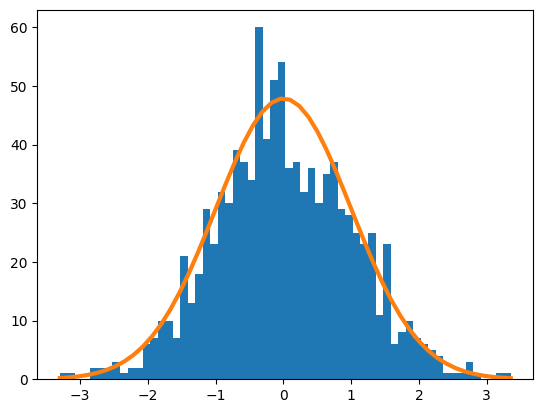

In [33]:
plt.hist(Z, bins=60)
grid = np.linspace(min(Z), max(Z))
plt.plot(grid, sps.norm.pdf(grid, 0, 1)*120, lw=3)

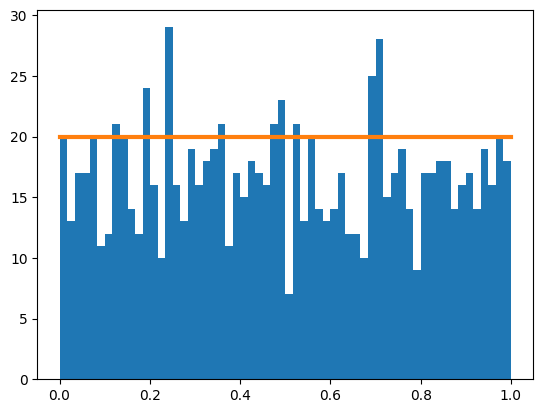

In [31]:
plt.hist(PV, bins=60)
grid = np.linspace(min(PV), max(PV))
plt.plot(grid, sps.uniform.pdf(grid, 0, 1)*20, lw=3)